In [34]:
import fnmatch, os, sys
# sys.path.append('/Users/sherryan/Desktop/cage_data/')
# print(sys.path)

In [35]:
import cage_data
import numpy as np
import pickle as pickle

In [36]:
# data_path = '/Users/sherryan/ssa-pop/'
data_path = "/Users/andrewshen/Desktop/neural_decoding/data/"
file_name = 'Pop_20210709_Cage_004.pkl'
print('The file %s is going to be loaded'%(data_path + file_name))
with open ( data_path + file_name, 'rb' ) as fp:
    my_cage_data = pickle.load(fp)
my_cage_data.pre_processing_summary()

The file /Users/andrewshen/Desktop/neural_decoding/data/Pop_20210709_Cage_004.pkl is going to be loaded


This is a non-sorted file
EMG filtered? -- False
EMG filtered? -- False
Cortical data cleaned? -- False
Data binned? -- True
Spikes smoothed? -- True


In [37]:
type(my_cage_data)

cage_data.cage_data.cage_data

In [38]:
print('There are %d cortical channels'%(len(my_cage_data.spikes)))
print('There are %d EMG channels'%(len(my_cage_data.EMG_diff)))
print('The raw EMG signals are sampled at %.3f Hz'%(my_cage_data.EMG_fs))
print('There are %d behavior segments in this file'%(len(my_cage_data.behave_tags['tag'])))
print('The length of this file is %.3f seconds'%(my_cage_data.EMG_timeframe[-1]))
print('Spikes and EMGs are binned or downsampled with %.3f seconds time bins'%(my_cage_data.binned['timeframe'][1]-my_cage_data.binned['timeframe'][0]))

There are 95 cortical channels
There are 16 EMG channels
The raw EMG signals are sampled at 2011.061 Hz
There are 38 behavior segments in this file
The length of this file is 900.216 seconds
Spikes and EMGs are binned or downsampled with 0.025 seconds time bins


In [39]:
my_cage_data.behave_tags['tag']

['crawling',
 'crawling',
 'crawling',
 'crawling',
 'crawling',
 'crawling',
 'crawling',
 'crawling',
 'crawling',
 'crawling',
 'crawling',
 'crawling',
 'crawling',
 'crawling',
 'crawling',
 'crawling',
 'crawling',
 'crawling',
 'crawling',
 'crawling',
 'crawling',
 'grooming',
 'pg',
 'pg',
 'pg',
 'pg',
 'pg',
 'pg',
 'pg',
 'pg',
 'pg',
 'pg',
 'pg',
 'sitting_still',
 'sitting_still',
 'sitting_still',
 'sitting_still',
 'sitting_still']

In [40]:
print(my_cage_data.binned.keys())

# To get the binned spike counts
binned_spike_counts = my_cage_data.binned['spikes']

# To get the rectified, filtered and downsampled EMGs
filtered_EMG = my_cage_data.binned['filtered_EMG']

# To get the time frame of the binned data
timeframe = my_cage_data.binned['timeframe']

FSR_data = my_cage_data.binned["FSR_data"]


dict_keys(['timeframe', 'spikes', 'filtered_EMG', 'FSR_data'])


In [41]:
# Andrew's code to save [T,N] M1 matrix and [T,M] EMG matrix

m1_data = np.transpose(binned_spike_counts)
emg_data = np.transpose(filtered_EMG)
# out_path = "/Users/andrewshen/Desktop/neural_decoding/data/"
# np.save(out_path + "m1", m1_data)
# np.save(out_path + "emg", emg_data)

In [42]:
N = 0
print('During the %dth behavior segment, the monkey was doing \'%s\''%(N, my_cage_data.behave_tags['tag'][N]))
print('The start time of the %dth behavior segment is at the %.3f second'%(N, my_cage_data.behave_tags['start_time'][N]))
print('The end time of the %dth behavior segment is at the %.3f second'%(N, my_cage_data.behave_tags['end_time'][N]))

During the 0th behavior segment, the monkey was doing 'crawling'
The start time of the 0th behavior segment is at the 8.220 second
The end time of the 0th behavior segment is at the 11.053 second


In [43]:
print(len(timeframe))
print(timeframe)

36007
[3.750000e-02 6.250000e-02 8.750000e-02 ... 9.001375e+02 9.001625e+02
 9.001875e+02]


In [44]:
spikes = np.array(binned_spike_counts)
emg = np.array(filtered_EMG)

In [45]:
def find_start_end(N):
    segment_range = np.where((timeframe>=my_cage_data.behave_tags['start_time'][N]) & (timeframe<=my_cage_data.behave_tags['end_time'][N]))[0]
    start_idx = segment_range[0]
    end_idx = segment_range[-1]
    return start_idx, end_idx

In [46]:
concat_spikes = []
for N in range(len(my_cage_data.behave_tags['tag'])):
    print('During the %dth behavior segment, the monkey was doing \'%s\''%(N, my_cage_data.behave_tags['tag'][N]))
    start_idx, end_idx = find_start_end(N)
    print(start_idx)
    print(end_idx)
    concat_spikes.append(spikes[:,start_idx:end_idx+1])

During the 0th behavior segment, the monkey was doing 'crawling'
328
440
During the 1th behavior segment, the monkey was doing 'crawling'
4552
4631
During the 2th behavior segment, the monkey was doing 'crawling'
4840
4949
During the 3th behavior segment, the monkey was doing 'crawling'
5765
5836
During the 4th behavior segment, the monkey was doing 'crawling'
6025
6100
During the 5th behavior segment, the monkey was doing 'crawling'
8557
8645
During the 6th behavior segment, the monkey was doing 'crawling'
8834
8952
During the 7th behavior segment, the monkey was doing 'crawling'
11552
11640
During the 8th behavior segment, the monkey was doing 'crawling'
11920
12044
During the 9th behavior segment, the monkey was doing 'crawling'
16500
16557
During the 10th behavior segment, the monkey was doing 'crawling'
16989
17104
During the 11th behavior segment, the monkey was doing 'crawling'
24032
24149
During the 12th behavior segment, the monkey was doing 'crawling'
26448
26605
During the 1

In [ ]:
# Andrew's code to keep only timestamps Set1 labeled behaviors for M1 and EMG
m1_data_labeled_set1 = None
emg_data_labeled_set1 = None
behavioral_labels_set1 = None
for N in range(len(my_cage_data.behave_tags['tag'])):
    start_idx, end_idx = find_start_end(N)
    behavioral_label = my_cage_data.behave_tags['tag'][N]
    if N==0:
        m1_data_labeled_set1 = m1_data[start_idx:end_idx+1]
        emg_data_labeled_set1 = emg_data[start_idx:end_idx+1]
        behavioral_labels_set1 = np.array([behavioral_label for i in range(end_idx-start_idx+1)])
    else:
        m1_data_labeled_set1 = np.concatenate((m1_data_labeled_set1, m1_data[start_idx:end_idx+1]))
        emg_data_labeled_set1 = np.concatenate((emg_data_labeled_set1, emg_data[start_idx:end_idx+1]))
        behavioral_labels_set1 = np.concatenate((behavioral_labels_set1, np.array([behavioral_label for i in range(end_idx-start_idx+1)])))

# Save M1, EMG, and Set1 behavioral labels
out_path = "/Users/andrewshen/Desktop/neural_decoding/data/"
np.save(out_path + "set1_data/m1_set1", m1_data_labeled_set1)
np.save(out_path + "set1_data/emg_set1", emg_data_labeled_set1)
np.save(out_path + "set1_data/behavioral_set1", behavioral_labels_set1)
    

In [19]:
i = 0
behav_dict = {'crawl': [], 'groom': [], 'pg': [],'sit': []}
for N in range(len(my_cage_data.behave_tags['tag'])):
    behavior = my_cage_data.behave_tags['tag'][N]
    if behavior == 'crawling':
        behav_dict['crawl'].append(i)
    if behavior == 'pg':
        behav_dict['pg'].append(i)
    if behavior == 'sitting_still':
        behav_dict['sit'].append(i)
    if behavior == 'grooming':
        behav_dict['groom'].append(i)
    start_idx, end_idx = find_start_end(N)
    i += end_idx - start_idx + 1
behav_dict['groom'].insert(0,behav_dict['crawl'][-1])
behav_dict['pg'].insert(0,behav_dict['groom'][-1])
behav_dict['sit'].insert(0,behav_dict['pg'][-1])

In [20]:
behav_dict

{'crawl': [0,
  113,
  193,
  303,
  375,
  451,
  540,
  659,
  748,
  873,
  931,
  1047,
  1165,
  1323,
  1491,
  1609,
  1718,
  1829,
  1923,
  2016,
  2112],
 'groom': [2112, 2192],
 'pg': [2192,
  2265,
  2404,
  2482,
  2553,
  2610,
  2773,
  2835,
  2897,
  3045,
  3169,
  3222],
 'sit': [3222, 3274, 3337, 3800, 3989, 4214]}

In [22]:
import numpy as np
import numpy.random as npr
from matplotlib import pyplot as plt
%matplotlib inline
from scipy.linalg import orth
import time

from ssa.models import fit_ssa, weighted_pca, weighted_rrr
from ssa.util import get_sample_weights

ModuleNotFoundError: No module named 'cloudpickle'

In [ ]:
#Start SSA fitting

In [ ]:
X0 = np.concatenate(concat_spikes,axis = 1).T
print(X0.shape)

(4997, 95)


In [ ]:
X=np.copy(X0-np.mean(X0,axis=0)[None,:])

In [ ]:
R_est = 20

In [ ]:
#Number of epochs of model fitting
n_epochs=7000

#Learning rate of model fitting
lr=.001


#I would recommend using the default lambda parameters, at least to start.
#When running SSA, it will print what the default values are for the given dataset

#Strength of the sparsity penalty
lam_sparse=.1

#Strength of the orthogonality penality (Note - This is only used in the version without a hard orthogonality constraint)
lam_orthog=1

In [ ]:
#How much to weight each data point in time
#(this can be helpful for making sure dimensions still aim to explain time points with low activity)

sample_weights=np.ones([X.shape[0],1]) #Weight equally

# sample_weights=get_sample_weights(X) #Weight inversely to norm of activity at each time point

In [ ]:
#Fit weighted PCA
#Note that this function does not automatically subtract the mean from the data (as in many PCA functions)
U_est_pca,V_est_pca = weighted_pca(X,R_est,sample_weights)

#Get the low dimensional representation (the principal components)
pca_latent = X@U_est_pca

In [ ]:
# infs_pca=[np.sum((pca_latent[:,i:i+1]@V_est_pca[i:i+1,:])**2,axis=1) for i in range(R_est)]
# max_array_pca=[np.argmax(infs_pca[i]) for i in range(R_est)]
# pca_order=np.argsort(np.array(max_array_pca))

# plt.figure(figsize=(15,5))
# for i in range(R_est):

#     # Plot PCA results
#     plt.subplot(R_est,1,i+1)
#     plt.plot(pca_latent[:,pca_order[i]])

#     plt.yticks([])
#     if i<R_est-1:
#         plt.xticks([])
#     else:
#         plt.xlabel('Time')

# plt.subplot(R_est,1,1)
# plt.title('PCA LowD Projections')


  0%|                                          | 7/7000 [00:00<01:49, 63.98it/s]

Using device cpu


100%|███████████████████████████████████████| 7000/7000 [01:39<00:00, 70.49it/s]


Text(0.5, 1.0, 'Loss over training')

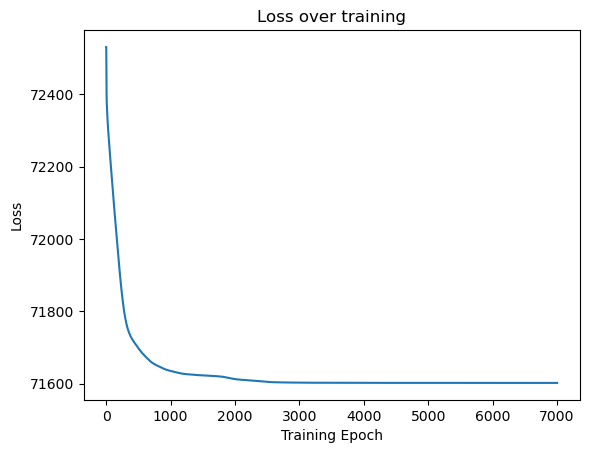

In [ ]:
#Fit SSA with orthogonality constraint without all the optional parameters
model, latent, y_pred, losses = fit_ssa(X=X,R=R_est,sample_weight=sample_weights,lam_sparse=lam_sparse,lr=lr,n_epochs=n_epochs)

#Fit SSA with orthogonality constraint
# model, latent, y_pred, losses = fit_ssa(X=X,R=R_est,sample_weight=sample_weights,lam_sparse=lam_sparse,lr=lr,n_epochs=n_epochs)


#Fit SSA with orthogonality penalty (rather than constraint) without all the optional parameters
# model, latent, y_pred, losses = fit_ssa(X=X,R=R_est,orth=False)

#Fit SSA with orthogonality penalty (rather than constraint)
# model, latent, y_pred, losses = fit_ssa(X=X,R=R_est,orth=False,sample_weight=sample_weights,lam_sparse=lam_sparse,lr=lr,n_epochs=n_epochs,lam_orthog=lam_orthog)




#Get the low dimensional representation
ssa_latent=latent.detach().numpy()

#Plot the loss over all iterations
plt.figure()
plt.plot(losses)
plt.xlabel('Training Epoch')
plt.ylabel('Loss')
plt.title('Loss over training')


Text(0, 0.5, 'Loss')

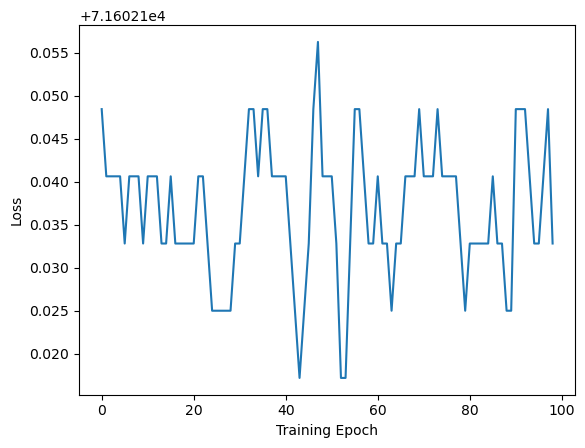

In [ ]:
#Plot the loss over the last 100 iterations (to see if it has truly hit a plateau)
plt.figure()
plt.plot(losses[-100:-1])
plt.xlabel('Training Epoch')
plt.ylabel('Loss')

In [ ]:
#Amount of squared activity each dimension explains in PCA
infs_pca=[np.sum((pca_latent[:,i:i+1]@V_est_pca[i:i+1,:])**2,axis=1) for i in range(R_est)]

#Amount of squared activity each dimension explains in SSA
V_est_ssa=model.fc2.weight.detach().numpy()
infs_ssa=[np.sum((ssa_latent[:,i:i+1]@V_est_ssa[:,i:i+1].T)**2,axis=1) for i in range(R_est)]

#Find the time point of each dimension that has the largest squared activity explained
max_array_pca=[np.argmax(infs_pca[i]) for i in range(R_est)]
max_array_ssa=[np.argmax(infs_ssa[i]) for i in range(R_est)]

#Order dimensions
pca_order=np.argsort(np.array(max_array_pca))
ssa_order=np.argsort(np.array(max_array_ssa))

In [ ]:
plt.figure(figsize=(15,5))
for i in range(R_est):


    # Plot SSA results
    plt.subplot(R_est,2,2*i+1)
    plt.plot(ssa_latent[:,ssa_order[i]])

    plt.yticks([])
    if i<R_est-1:
        plt.xticks([])
    else:
        plt.xlabel('Time')

    # Plot PCA results
    plt.subplot(R_est,2,2*i+2)
    plt.plot(pca_latent[:,pca_order[i]])

    plt.yticks([])
    if i<R_est-1:
        plt.xticks([])
    else:
        plt.xlabel('Time')


plt.subplot(R_est,2,1)
plt.title('SCA LowD Projections')

plt.subplot(R_est,2,2)
plt.title('PCA LowD Projections')

NameError: name 'R_est' is not defined

<Figure size 1500x500 with 0 Axes>

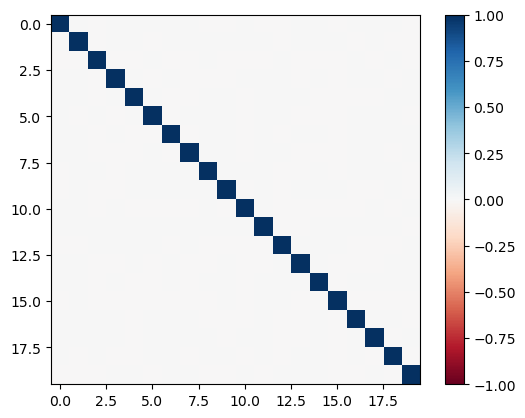

In [ ]:
product=model.fc2.weight.detach().numpy().T@model.fc2.weight.detach().numpy()
plt.imshow(product,clim=[-1,1],cmap='RdBu')
plt.colorbar()

/var/folders/c_/3p5f6szx247fkf6ftdgp147w0000gn/T/ipykernel_17622/275902210.py:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(R_est,1,1)


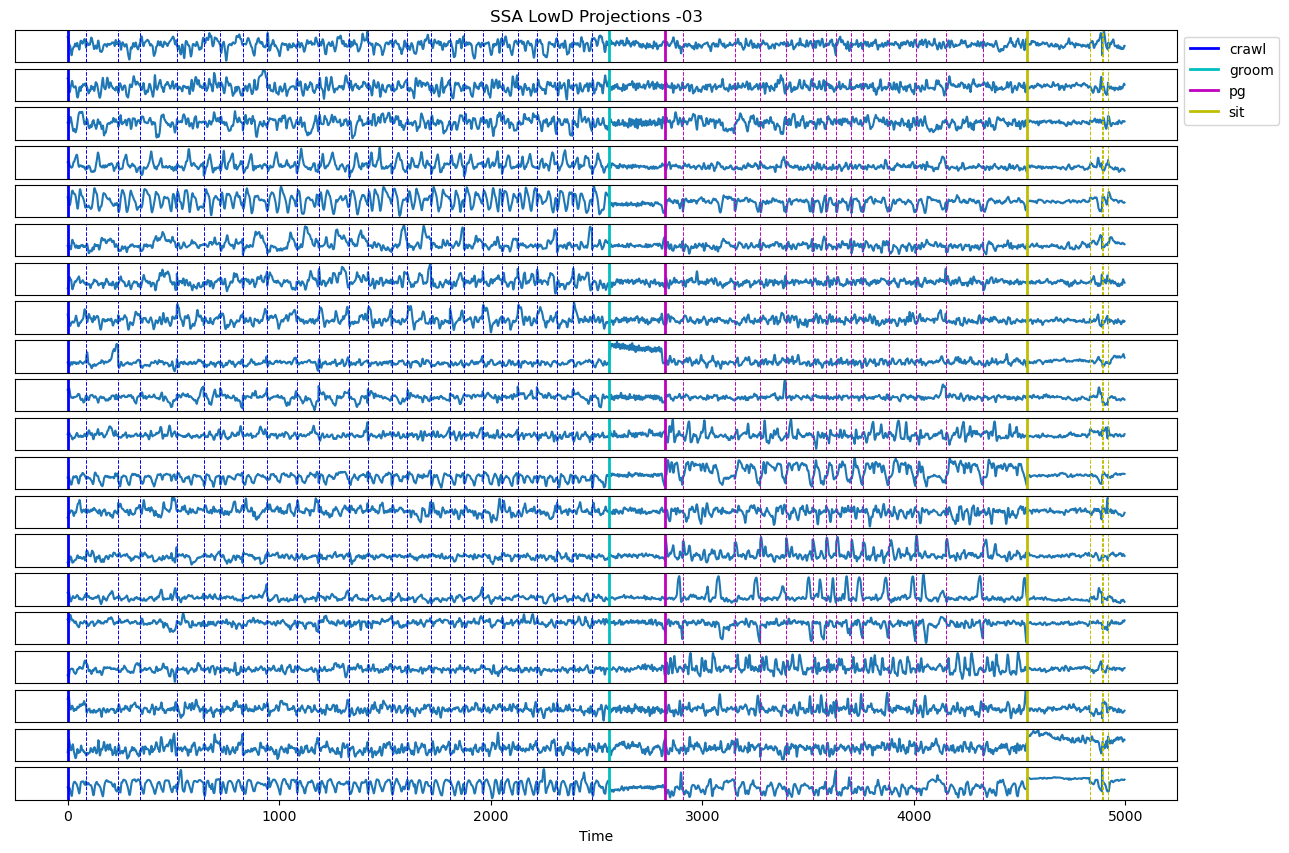

In [ ]:
plt.figure(figsize=(15,10))
colors = ['b','c','m','y']

for i in range(R_est):
    # Plot SSA results
    plt.subplot(R_est,1,i+1)
    plt.plot(ssa_latent[:,ssa_order[i]])

    plt.yticks([])
    if i<R_est-1:
        plt.xticks([])
    else:
        plt.xlabel('Time')
    col = 0
    for key in behav_dict.keys():
        if key == 'crawl':
            x_l = behav_dict[key][0]
        else:
            x_l = behav_dict[key][1]
        plt.axvline(x = x_l, color = colors[col], label = key, linestyle = '-', linewidth=2)
        for k in range(1,len(behav_dict[key])):
            plt.axvline(x = behav_dict[key][k], color = colors[col], linestyle = '--', linewidth=.7)
        col += 1

plt.subplot(R_est,1,1)
plt.title('SSA LowD Projections -03')

# place legend outside
plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper left')